# Exercise - 3

## 1 Epoch

In [32]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
import umap as um

In [33]:
# Define the CNN model
def get_model():
    inputs = Input(shape=(28, 28, 1))
    x = Conv2D(32, (3, 3), activation='relu')(inputs)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(10, activation='softmax')(x)
    return Model(inputs=inputs, outputs=outputs)

In [34]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize and reshape data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_test = x_test.reshape((-1, 28, 28, 1))

In [36]:
# prepare the model
model = get_model()

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-6),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model for one epoch as given in the assignment instructions
_ = model.fit(x_train, y_train, epochs=1)

1875/1875 [==============================] - 15s 8ms/step - loss: 2.2639 - accuracy: 0.2132


In [37]:
# Extract the features from the model
feature_model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
features = feature_model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


CPU times: user 3 s, sys: 1.43 s, total: 4.43 s
Wall time: 578 ms


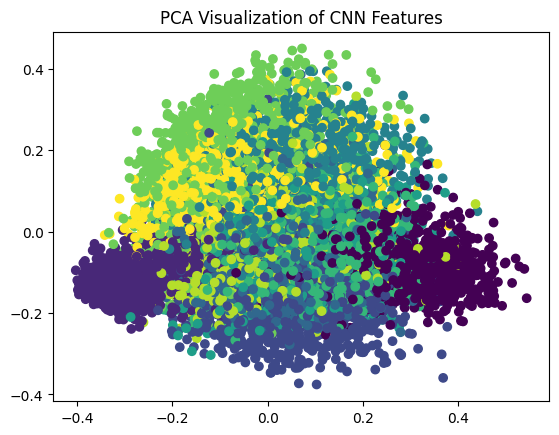

In [38]:
# Visualize the features using PCA
pca = PCA(n_components=2)
%time pca_features = pca.fit_transform(features)
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=y_test)
plt.title('PCA Visualization of CNN Features')
plt.show()

CPU times: user 1min 58s, sys: 20.7 s, total: 2min 19s
Wall time: 31.4 s


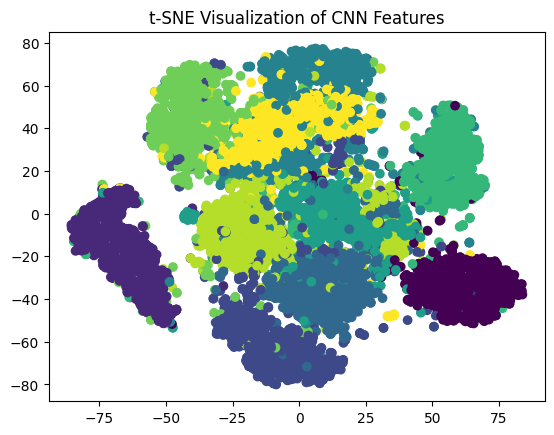

In [39]:
# Visualize the features using t-SNE
tsne = TSNE(n_components=2)
%time tsne_features = tsne.fit_transform(features)
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=y_test)
plt.title('t-SNE Visualization of CNN Features')
plt.show()

CPU times: user 16.7 s, sys: 2.42 s, total: 19.1 s
Wall time: 3.63 s


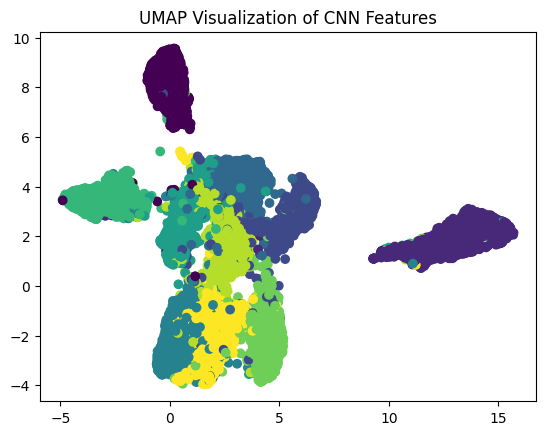

In [40]:
import umap
umap = um.UMAP(n_components=2)
%time umap_features = umap.fit_transform(features)

plt.scatter(umap_features[:, 0], umap_features[:, 1], c=y_test)
plt.title('UMAP Visualization of CNN Features')
plt.show()

## 20 Epochs

In [44]:
# prepare the model
model = get_model()

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model for 10-20 epochs as given in the assignment instructions
_ = model.fit(x_train, y_train, epochs=20, batch_size=1024)

Epoch 1/20
59/59 [==============================] - 2s 21ms/step - loss: 0.7339 - accuracy: 0.8151
Epoch 2/20
59/59 [==============================] - 1s 17ms/step - loss: 0.1674 - accuracy: 0.9513
Epoch 3/20
59/59 [==============================] - 1s 17ms/step - loss: 0.1054 - accuracy: 0.9691
Epoch 4/20
59/59 [==============================] - 1s 17ms/step - loss: 0.0793 - accuracy: 0.9762
Epoch 5/20
59/59 [==============================] - 1s 18ms/step - loss: 0.0652 - accuracy: 0.9803
Epoch 6/20
59/59 [==============================] - 1s 17ms/step - loss: 0.0551 - accuracy: 0.9837
Epoch 7/20
59/59 [==============================] - 1s 17ms/step - loss: 0.0491 - accuracy: 0.9853
Epoch 8/20
59/59 [==============================] - 1s 17ms/step - loss: 0.0433 - accuracy: 0.9873
Epoch 9/20
59/59 [==============================] - 1s 17ms/step - loss: 0.0396 - accuracy: 0.9884
Epoch 10/20
59/59 [==============================] - 1s 17ms/step - loss: 0.0357 - accuracy: 0.9891
Epoch 11/

In [45]:
# Extract the features from the model
feature_model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
features = feature_model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


CPU times: user 4.55 s, sys: 2.03 s, total: 6.58 s
Wall time: 836 ms


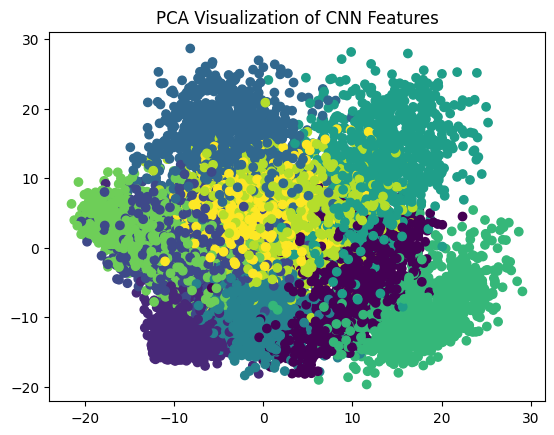

In [46]:
# Visualize the features using PCA
pca = PCA(n_components=2)
%time pca_features = pca.fit_transform(features)
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=y_test)
plt.title('PCA Visualization of CNN Features')
plt.show()

CPU times: user 1min 44s, sys: 19.4 s, total: 2min 3s
Wall time: 30.8 s


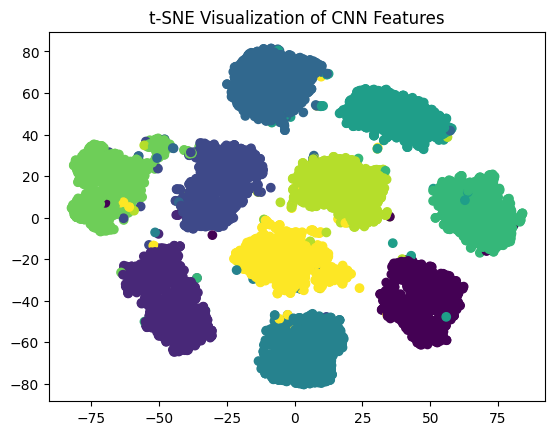

In [47]:
# Visualize the features using t-SNE
tsne = TSNE(n_components=2)
%time tsne_features = tsne.fit_transform(features)
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=y_test)
plt.title('t-SNE Visualization of CNN Features')
plt.show()

CPU times: user 16.8 s, sys: 2.32 s, total: 19.1 s
Wall time: 3.38 s


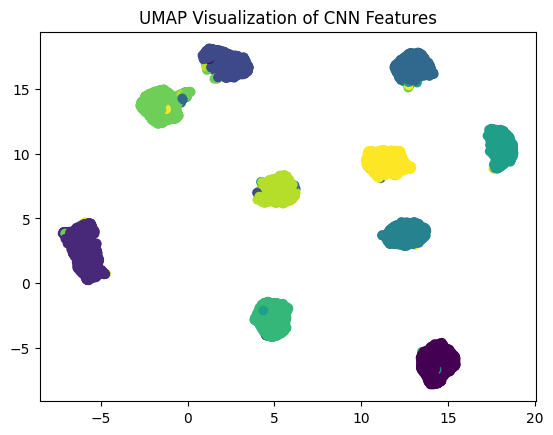

In [48]:
umap = um.UMAP(n_components=2)
%time umap_features = umap.fit_transform(features)

plt.scatter(umap_features[:, 0], umap_features[:, 1], c=y_test)
plt.title('UMAP Visualization of CNN Features')
plt.show()

The four visualizations show the distribution of features extracted from the MNIST images using a CNN model, trained for one epoch with a very small learning rate of 1e-6, and for 20 epochs with a larger learning rate of 1e-3.

(a) The main difference between PCA and t-SNE is the way they map high-dimensional data to a low-dimensional space. PCA aims to find the principal components that explain the maximum variance in the data and projects the data onto a new coordinate system defined by these components. In contrast, t-SNE is a non-linear method that preserves the local structure of the data while also trying to separate clusters. This results in more meaningful visualizations where clusters are well-separated and the underlying structure of the data is preserved.

(b) The first model, trained for only one epoch with a small learning rate, extracts features that are not very discriminative and do not show clear clusters in the PCA or t-SNE visualizations. This is expected since the model has not been able to learn complex patterns in the data in such a short time. On the other hand, the second model, trained for 20 epochs with a larger learning rate, extracts features that are more discriminative and show clear clusters in the PCA and t-SNE visualizations. This indicates that the model has learned more complex patterns in the data and can distinguish between different classes with higher accuracy. Based on this,we came to the conclusion that the second model extracts more meaningful features that better capture the structure of the MNIST dataset.